# ___
# [ Geoinformatika ]

## Strojové učení


**Katedra aplikované geoinformatiky a kartografie**, Přírodovědecká fakulta, Univerzita Karlova
Albertov 6, 128 43 Praha 2

*Lukáš Brodský lukas.brodsky@natur.cuni.cz*

### Neuronová síť v Numerickém Pythonu 
bez dedikovaných knihoven (PyTorch, TensorFlow, Keras) 

In [ ]:
... 

In [40]:
# Knihovny pro praci
import os
import numpy as np
print('Numpy verze: {}'.format(np.__version__))
import pandas as pd 
print('Pandas verze: {}'.format(pd.__version__))

import matplotlib.pyplot as plt
# Jupyter notebook vizualizace
%matplotlib inline
import seaborn as sns

Numpy verze: 1.21.4
Pandas verze: 1.3.4


In [2]:
# Numpy matice
# 4 * 2 
a = np.array([[1, 0], [0, 1], [0, 2], [0, 3]])
# 2 * 3 
b = np.array([[4, 1, 3], [2, 2, 3]])

In [4]:
print(a)

[[1 0]
 [0 1]
 [0 2]
 [0 3]]


In [5]:
# 4 * 3 matice (Dot Product)
c = np.dot(a, b)
print(c)

[[4 1 3]
 [2 2 3]
 [4 4 6]
 [6 6 9]]


In [49]:
os.getcwd()
os.listdir()

['rozhodovaci_strom.ipynb',
 'instalace_overeni_balicku.ipynb',
 'instalace_overeni.py',
 'neuronova_sit_v_numpy_proto2.ipynb',
 'test_data_X_y.csv',
 'iris-dataset.png',
 'test_cls_data.csv',
 '_tmp_',
 '.ipynb_checkpoints',
 'check_packages.ipynb_files',
 'neuronova_sit_v_numpy_proto.ipynb']

In [28]:
# nacteni mini dat (pozor data maji jediny ucel - demonstrovat proces uceni neuronove site!)
df = pd.read_csv('test_data_X_y.csv')
df.head()

,x1,x2,y
0,86,104,1
1,78,111,0
2,79,114,0
3,77,105,0
4,90,100,1


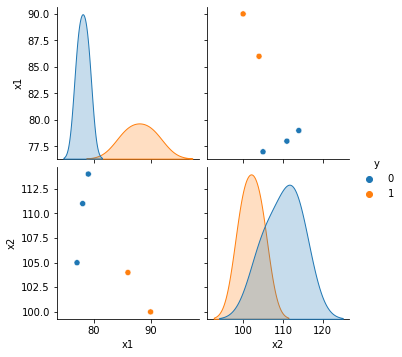

In [41]:
# vizualizace atributu - pruzkumova analyza 
sns.pairplot(data=df, hue = 'y')

In [42]:
# vstupni (X) a vystupni (y) mnoziny
X = df[['x1','x2']] 
y = df['y']

In [45]:
# Priprava dat (dimenzionalita)
X.shape

(5, 2)

In [46]:
y.shape

(5,)

In [48]:
# uprava do stejne dimenzionality 
y.values.reshape(y.shape[0],1).shape

(5, 1)

### Neuronová sit

Sigmoid (logisticka funkce)

$$ g(z) =  \frac{\mathrm{1} }{\mathrm{1} + e^{-z} }  $$ 


Derivace funkce

$$ g'(z) =  g(z) . (1 - g(z))  $$ 


In [43]:
# sigmoidni funkce 
def sigmoid(vstup):
    vystup = 1 / (1 + np.exp(-vstup))
    return vystup


In [44]:
# derivace sigmoidni function
def sigmoid_derivace(vstup):
    return sigmoid(vstup) * (1.0 - sigmoid(vstup))


In [32]:
# Uceni neuronove site
def uceni_site(priznaky, reference, vahy, bias, rychlost_uceni, epochy):
    for epocha in range(epochy):
        dot_prod = np.dot(priznaky, vahy) + bias
        # sigmoid
        predikce = sigmoid(dot_prod) 
        # Vypocet ztrat 
        chyby = predikce - reference 
        # sigmoid deriv. 
        deriva_ztratova_funkce = chyby 
        deriva_predikce = sigmoid_derivace(predikce) 
        deriva_produkt = deriva_ztratova_funkce * deriva_predikce 
        # aktualizace vah
        vahy = vahy - np.dot(priznaky.T, deriva_produkt) * rychlost_uceni
        ztrata = chyby.sum()
        print(ztrata)
    for i in deriva_produkt:
        bias = bias - i * rychlost_uceni
    
    return vahy, bias  


In [ ]:
# prejmenovani vstupu, vystupu
priznaky = X
reference = y.values.reshape(y.shape[0],1) 

In [36]:
# inicializace paramteru (nahodna)
np.random.seed(10)
vahy = np.random.rand(2,1) 
bias = np.random.rand(1) 

# nastav rychlost uceni a pocet ucicich se cyklu 
rychlost_uceni = 0.0004
epochy = 20

In [37]:
vahy_finalni, bias_finalni = uceni_site(priznaky, reference, vahy, bias, rychlost_uceni, epochy)

3.0
3.0
3.0
3.0
3.0
3.0
3.0
2.9999999999999867
2.9999999999990044
2.999999999925474
2.9999999943681033
2.999999570558996
2.9999669873696293
2.9974464551848943
2.817687239179599
0.8439294392698701
0.2898900344277985
0.1623952175091683
0.10040144943879462
0.06321005690835024


In [38]:
# Predikce 
nova_X = np.array([[86,104]])
dot_prod = np.dot(nova_X, vahy_finalni) + bias_finalni
nova_predikce = sigmoid(dot_prod) >= 1/2
print('Vysledek predikce: {}'.format(nova_predikce[0]))

Vysledek predikce: [ True]


In [ ]:
# ukol: zapis ztraty pro jednoltive epochy a vizualizuj graficky zavislot (x: epochy, y: ztrata)
# zvol vetsi pocet epoch
# otazka: pri jakem poctu epoch muzeme uceni zastavit? 